Department of Computer Engineering

University of Peradeniya

Machine Learning Lab Three

E/19/306

Class Boundaries and Posterior Probabilities

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den 


In [4]:

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

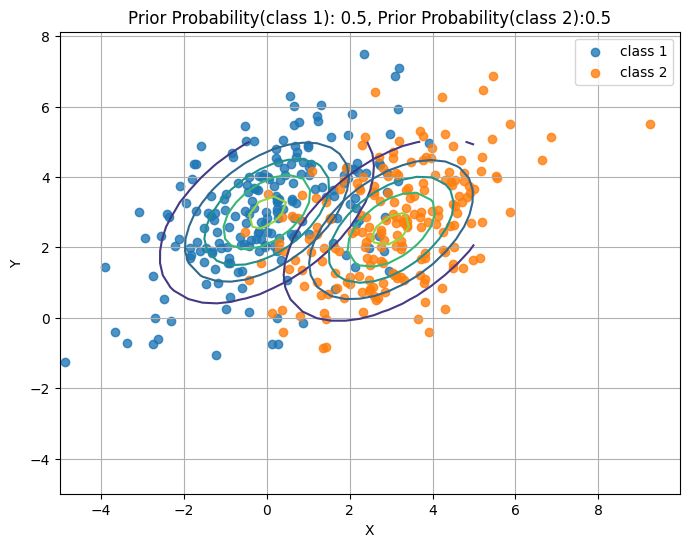

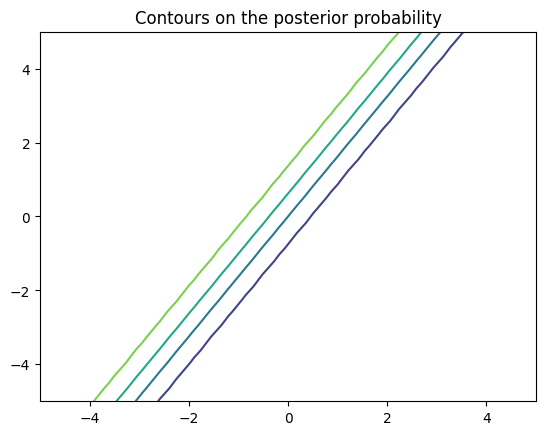

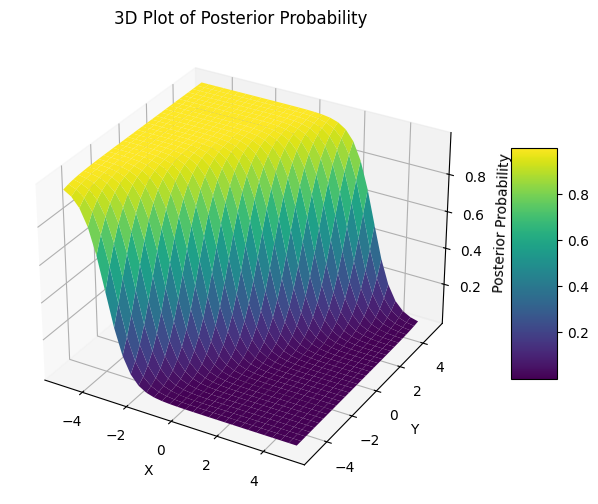

In [5]:
nx, ny = 30, 30
P1, P2 = 0.5, 0.5 
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2,1], [1,2]])
C2 = np.array([[2,1], [1,2]])

# Plot scatter graphs 

# Generate random samples from the two Gaussian distributions
samples1 = np.random.multivariate_normal(m1, C1, size=200)
samples2 = np.random.multivariate_normal(m2, C2, size=200)

# Plot scatter graphs for both data sets
plt.figure(figsize=(8, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], label='class 1', alpha=0.8)
plt.scatter(samples2[:, 0], samples2[:, 1], label='class 2', alpha=0.8)

# plot contours on scatter  
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp1, Yp1, Zp1, 5)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp2, Yp2, Zp2, 5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prior Probability(class 1): 0.5, Prior Probability(class 2):0.5')
plt.legend()
plt.grid(True)
plt.show()     


def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den 
    return X,Y,Z
   
# Plot contours of Posterior probability 
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.title('Contours on the posterior probability')
plt.contour(Xp, Yp, Zp, 5) 

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xp, Yp, Zp, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Posterior Probability')
ax.set_title('3D Plot of Posterior Probability')

# add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



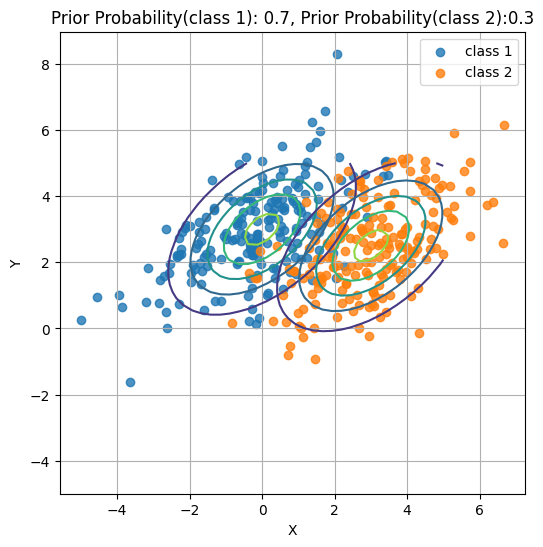

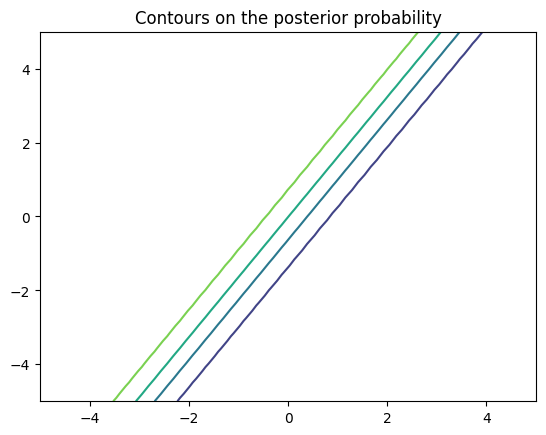

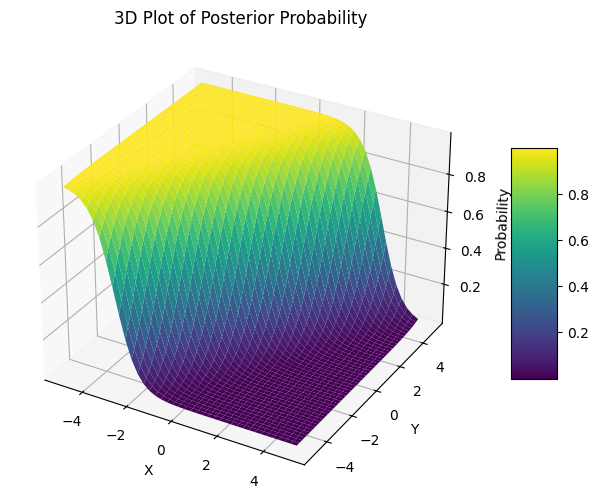

In [6]:
import matplotlib.pyplot as plt
import numpy as np

nx, ny = 40, 50
P1, P2 = 0.7, 0.3 
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2,1], [1,2]])
C2 = np.array([[2,1], [1,2]])

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# Plot scatter graphs 

# Generate random samples from the two Gaussian distributions
samples1 = np.random.multivariate_normal(m1, C1, size=200)
samples2 = np.random.multivariate_normal(m2, C2, size=200)

# Plot scatter graphs for both data sets
plt.figure(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], label='class 1', alpha=0.8)
plt.scatter(samples2[:, 0], samples2[:, 1], label='class 2', alpha=0.8)

# plot contours on scatter  
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp1, Yp1, Zp1, 5)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp2, Yp2, Zp2, 5)


# Plot contours
#
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.title('Contours on the posterior probability')
plt.contour(Xp, Yp, Zp, 5) 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prior Probability(class 1): 0.7, Prior Probability(class 2):0.3')
plt.legend()
plt.grid(True)
plt.show()   

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den 
    return X,Y,Z

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den 
      

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xp, Yp, Zp, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability')
ax.set_title('3D Plot of Posterior Probability')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


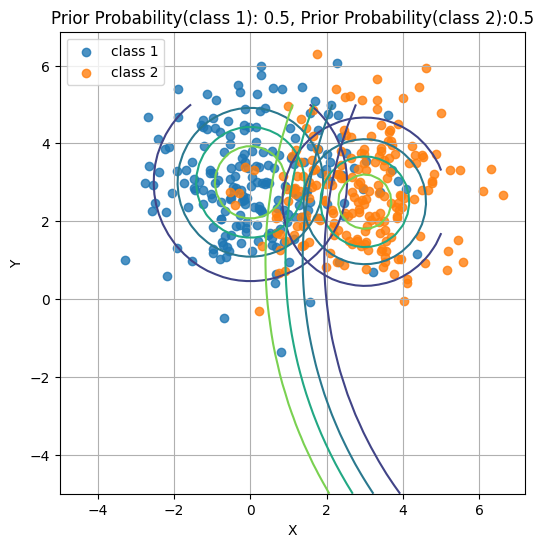

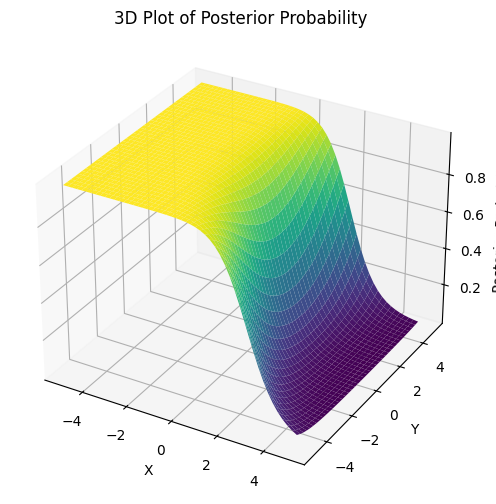

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


nx, ny = 50, 40
P1, P2 = 0.5, 0.5 
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2,0], [0,2]])
C2 = np.array([[1.5,0], [0,1.5]])

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# Plot scatter graphs 

# Generate random samples from the two Gaussian distributions
samples1 = np.random.multivariate_normal(m1, C1, size=200)
samples2 = np.random.multivariate_normal(m2, C2, size=200)

# Plot scatter graphs for both data sets
plt.figure(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], label='class 1', alpha=0.8)
plt.scatter(samples2[:, 0], samples2[:, 1], label='class 2', alpha=0.8)

# plot contours on scatter  
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp1, Yp1, Zp1, 5)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp2, Yp2, Zp2, 5)

# Plot contours
#
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
plt.title('Contours on the posterior probability class 1')
plt.contour(Xp, Yp, Zp, 5) 

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prior Probability(class 1): 0.5, Prior Probability(class 2):0.5')
plt.legend()
plt.grid(True)
plt.show()

def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')

    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2)
            Z[i,j] = num / den 
    return X,Y,Z

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den 
   

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xp, Yp, Zp, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Posterior Probability')
ax.set_title('3D Plot of Posterior Probability')
plt.show()

Fisher LDA and ROC Curve

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

nx, ny = 50, 40
m1 = np.array([0,3])
C1 = np.array([[2,1], [1,2]], np.float32)

m2 = np.array([3,2.5])
C2 = np.array([[2,1], [1,2]], np.float32)

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 7, nx)
    y = np.linspace(-5, 7, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z



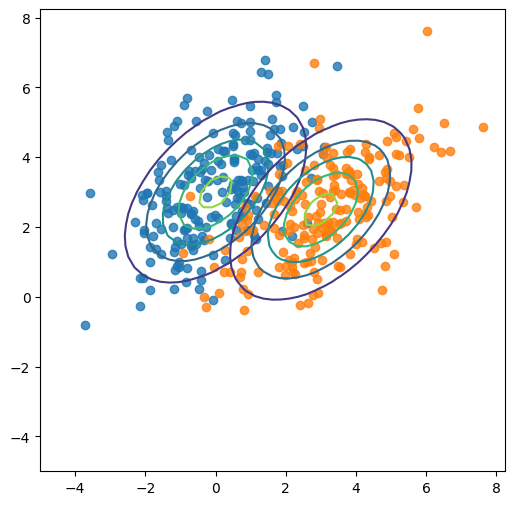

In [9]:
# Plot scatter graphs 

# Generate random samples from the two Gaussian distributions
samples1 = np.random.multivariate_normal(m1, C1, size=200)
samples2 = np.random.multivariate_normal(m2, C2, size=200)

# Plot scatter graphs for both data sets
plt.figure(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], label='class 1', alpha=0.8)
plt.scatter(samples2[:, 0], samples2[:, 1], label='class 2', alpha=0.8)

# plot contours on scatter  
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp1, Yp1, Zp1, 5)

Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp2, Yp2, Zp2, 5)


In [10]:
Ci = np.linalg.inv(2*C1)
wF = Ci @ (m2-m1)
uF = wF/np.linalg.norm(wF)

yp1 = samples1 @ uF
yp2 = samples2 @ uF

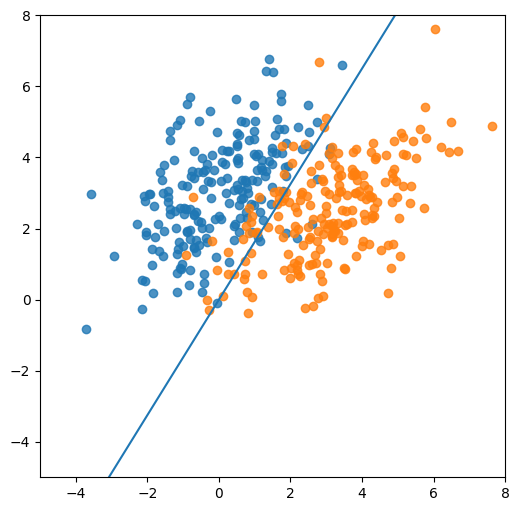

In [11]:
x = np.linspace(-5,8,100)
y = -uF[0]/uF[1]*x

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], label='class 1', alpha=0.8)
plt.scatter(samples2[:, 0], samples2[:, 1], label='class 2', alpha=0.8)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)
ax.plot(x,y)

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  2.,  4.,  4.,  6.,
        10.,  7.,  4.,  6.,  7.,  7.,  6.,  7.,  8., 14., 11., 14., 13.,
         9.,  9.,  8., 10.,  7.,  6.,  2.,  2.,  4.,  2.,  1.,  2.,  2.,
         2.]),
 array([-2.1389342 , -1.98712531, -1.83531641, -1.68350751, -1.53169862,
        -1.37988972, -1.22808083, -1.07627193, -0.92446303, -0.77265414,
        -0.62084524, -0.46903635, -0.31722745, -0.16541855, -0.01360966,
         0.13819924,  0.29000813,  0.44181703,  0.59362592,  0.74543482,
         0.89724372,  1.04905261,  1.20086151,  1.3526704 ,  1.5044793 ,
         1.6562882 ,  1.80809709,  1.95990599,  2.11171488,  2.26352378,
         2.41533268,  2.56714157,  2.71895047,  2.87075936,  3.02256826,
         3.17437716,  3.32618605,  3.47799495,  3.62980384,  3.78161274,
         3.93342163]),
 <BarContainer object of 40 artists>)

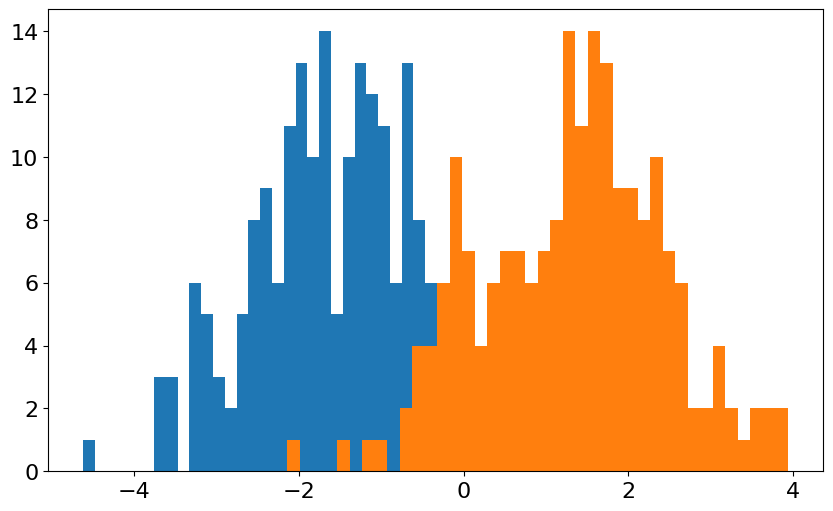

In [12]:
#plot hostograms
#
plt.figure(figsize=(10, 6))
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
# plt.savefig('histogramprojections.png')

-4.610964579087774 3.933421634863606


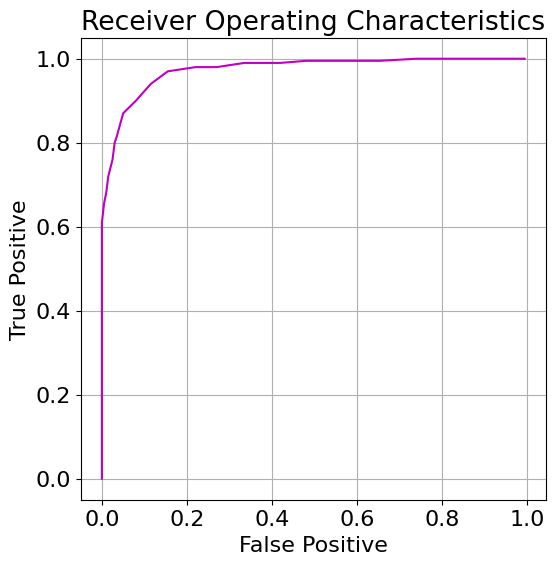

In [13]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
   thresh = thRange[i]
   TP = len(yp2[yp2 > thresh]) * 1 / len(yp2)
   FP = len(yp1[yp1 > thresh]) * 1 / len(yp1)
   ROC[i,:] = [TP, FP]
   
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
# plt.savefig('rocCurve.png')

In [14]:
# Assuming ROC is your NumPy array
AUC = np.trapz(ROC[::-1,0], x=ROC[::-1, 1])

print("Area under curve (AUC):", AUC)

Area under curve (AUC): 0.9689375


#### Projecting Classes onto a Random Direction

[[0.79939873]
 [0.60080086]]


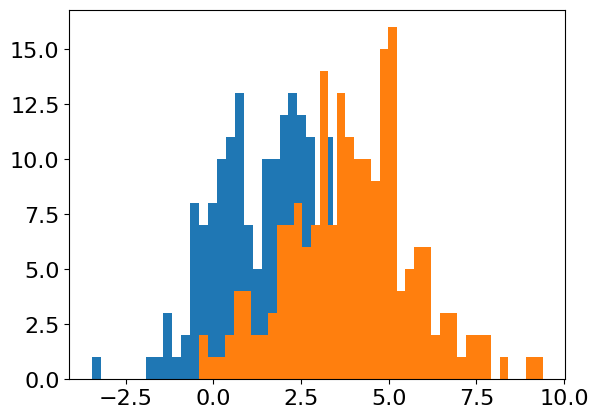

In [15]:
wF = np.random.rand(2,1)
uF = wF/np.linalg.norm(wF)
print(uF)
yp1 = samples1 @ uF
yp2 = samples2 @ uF
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

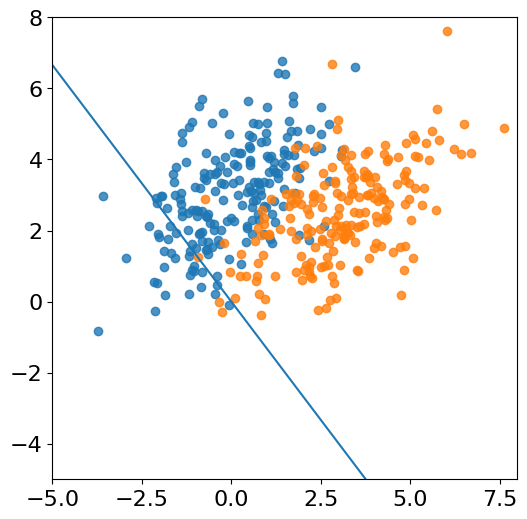

In [16]:
x = np.linspace(-5,8,100)
y = -uF[0]/uF[1]*x

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], label='class 1', alpha=0.8)
plt.scatter(samples2[:, 0], samples2[:, 1], label='class 2', alpha=0.8)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)
ax.plot(x,y)

-3.46457257390225 9.392849967902967


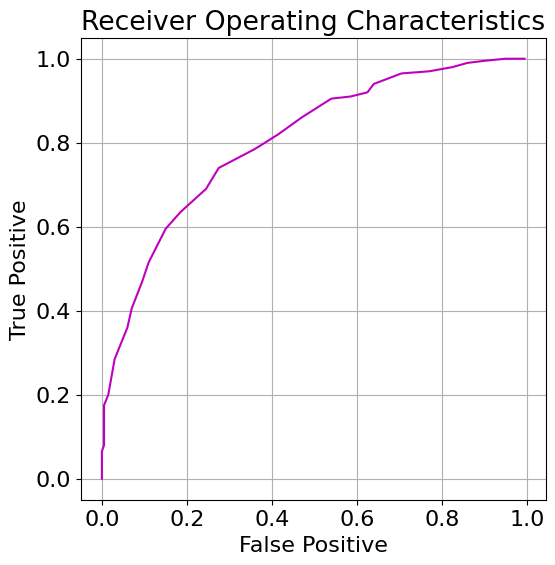

In [17]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
   thresh = thRange[i]
   TP = len(yp2[yp2 > thresh]) * 1 / len(yp2)
   FP = len(yp1[yp1 > thresh]) * 1 / len(yp1)
   ROC[i,:] = [TP, FP]
   
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
# plt.savefig('rocCurve.png')

In [18]:
print("Area under curve (AUC):",np.trapz(ROC[::-1,0], ROC[::-1,1]))


Area under curve (AUC): 0.7984125


#### For direction connecting the means

In [19]:
wF = m2-m1
uF = wF/np.linalg.norm(wF)
print(uF)
yp1 = samples1 @ uF
yp2 = samples2 @ uF

[ 0.98639392 -0.16439899]


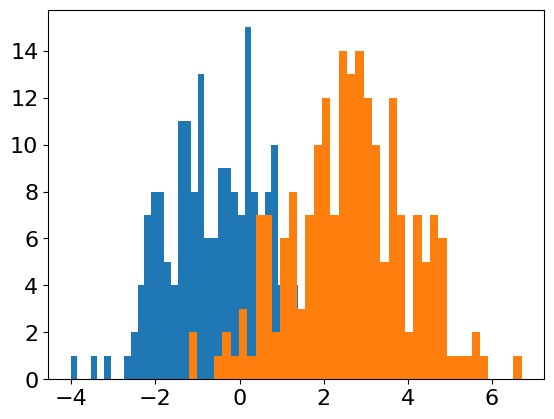

In [20]:
matplotlib.rcParams.update({'font.size': 16})
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)
plt.savefig('histogramprojections.png')

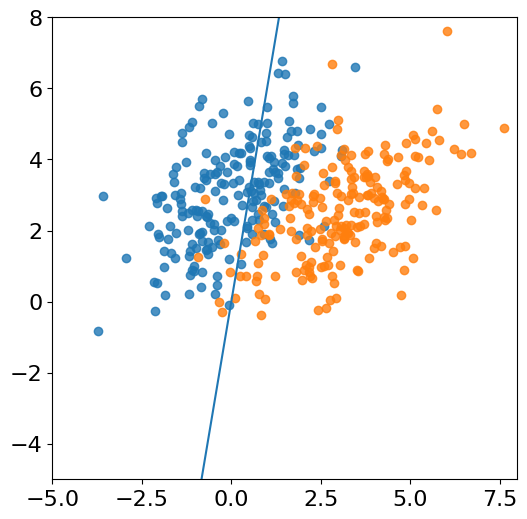

In [21]:
x = np.linspace(-5,8,100)
y = -uF[0]/uF[1]*x

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], label='class 1', alpha=0.8)
plt.scatter(samples2[:, 0], samples2[:, 1], label='class 2', alpha=0.8)
ax.set_xlim(-5, 8)
ax.set_ylim(-5, 8)
ax.plot(x,y)

-4.02007478827895 6.714870966022963


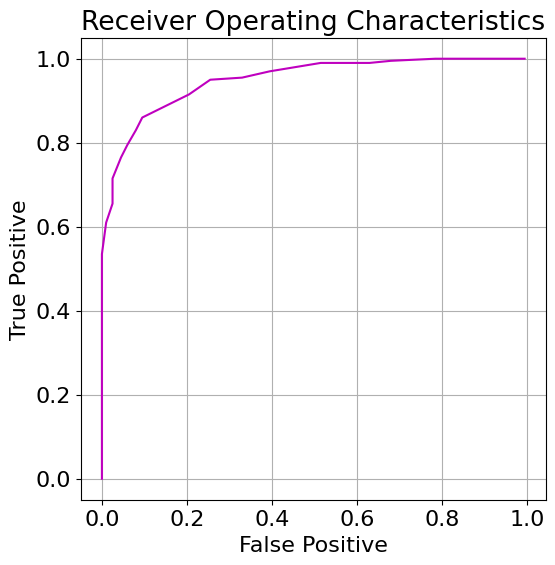

In [22]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
# Set up an array of thresholds
#
nRocPoints = 50
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold
#
for i in range(len(thRange)):
   thresh = thRange[i]
   TP = len(yp2[yp2 > thresh]) * 1 / len(yp2)
   FP = len(yp1[yp1 > thresh]) * 1 / len(yp1)
   ROC[i,:] = [TP, FP]
   
# Plot ROC curve
#
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
# plt.savefig('rocCurve.png')

In [23]:
print("Area under curve (AUC):",np.trapz(ROC[::-1,0], ROC[::-1,1]))


Area under curve (AUC): 0.9447


#### Mahalanobis Distance

In [24]:
from scipy.spatial.distance import mahalanobis

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])

C1 = np.array([[2,1], [1,2]])
C2 = np.array([[2,1], [1,2]])

C_inv = np.linalg.inv(C1) 

samples1 = np.random.multivariate_normal(m1, C1, size=200)
samples2 = np.random.multivariate_normal(m2, C2, size=200)

mahalanobis_distance = mahalanobis(samples1[0], samples1[1], C_inv)
print(mahalanobis_distance)

mahalanobis_distance = mahalanobis(samples2[0], samples2[1], C_inv)
print(mahalanobis_distance)

0.2512913485222204
2.732469702674785
